In [14]:
import pandas as pd
import seaborn as sns

In [15]:
df = pd.read_csv(r"C:\Users\dngo6\Downloads\estonia.csv")

In [16]:
df

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0
...,...,...,...,...,...,...,...,...
984,985,Sweden,ANNA INGRID BIRGITTA,OSTROM,F,60,P,0
985,986,Sweden,ELMAR MIKAEL,OUN,M,34,P,1
986,987,Sweden,ENN,QUNAPUU,M,77,P,0
987,988,Sweden,LY,GUNAPUU,F,87,P,0


In [17]:
totalmales = 0
totalfemales = 0
for passenger in df["Sex"]:
    if passenger == "M":
        totalmales += 1
    elif passenger == "F":
        totalfemales += 1

malesurvive = 0
maledied = 0
femalesurvive = 0
femaledied = 0

for idx in range(len(df)):
    if df.loc[idx]['Survived'] == 0 and df.loc[idx]['Sex']=='M':
        maledied+=1
    if df.loc[idx]['Survived'] == 1 and df.loc[idx]['Sex']=='M':
        malesurvive+=1
    if df.loc[idx]['Survived'] == 0 and df.loc[idx]['Sex']=='F':
        femaledied+=1
    if df.loc[idx]['Survived'] == 1 and df.loc[idx]['Sex']=='F':
        femalesurvive=+1
        
contable = pd.DataFrame({
    'Male': [malesurvive/totalmales * 100, maledied/totalmales * 100],
    'Female': [femalesurvive/totalfemales * 100, femaledied/totalfemales * 100]
})
contable.index = ['Survived', 'Died']
print(contable)

               Male     Female
Survived  21.868787   0.205761
Died      78.131213  94.444444


<AxesSubplot:xlabel='Ages', ylabel='Count'>

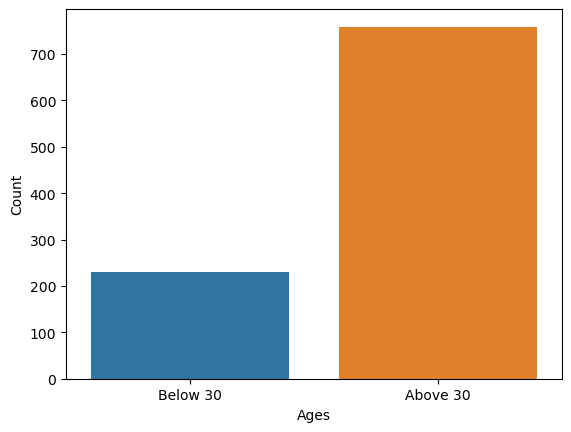

In [19]:
ageGroups = {'Ages':['Below 30', 'Above 30'], 'Count':[0,0]}
for person in df['Age']:
    if person < 30:
        ageGroups['Count'][0]+=1
    else:
        ageGroups['Count'][1]+=1
ageDF = pd.DataFrame(ageGroups)
sns.barplot(data=ageDF, x="Ages", y="Count")